### COVID-19 Deaths

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
covid = pd.read_csv("covid-states.csv")
covid.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,A,122.0,122.0,0,NaN,768.0,768.0,164.0,...,1024643.0,6015,NaN,NaN,NaN,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,A,3711.0,3326.0,73,385.0,25821.0,25821.0,1801.0,...,1603523.0,9681,NaN,NaN,73187.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,A+,2522.0,2312.0,10,210.0,9110.0,9110.0,1088.0,...,1703266.0,11813,NaN,21856.0,NaN,144866.0,NaN,0,1703266.0,11813
3,2020-12-02,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,A+,6739.0,6237.0,52,502.0,26312.0,26312.0,2699.0,...,2288204.0,16290,365871.0,NaN,NaN,NaN,2288204.0,16290,NaN,0


In [3]:
#print("Size/Shape of the dataset",covid.shape)
#print("Checking for null values:\n",covid.isnull().sum())
#print("Checking Data-type:",covid.dtypes)

In [4]:
covid.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [5]:
#Drop columns
covid.drop(['dataQualityGrade','deathIncrease',\
       'deathProbable','hospitalizedCumulative','hospitalizedIncrease',\
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',\
       'negativeTestsViral', 'onVentilatorCumulative','positiveScore',\
       'positiveTestsAntibody', 'positiveTestsAntigen',\
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',\
       'totalTestEncountersViralIncrease', 'totalTestResults',\
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',\
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen'],1,inplace = True)

In [6]:
covid.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'hospitalized',
       'hospitalizedCurrently', 'inIcuCumulative', 'inIcuCurrently',
       'negative', 'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveTestsViral',
       'recovered', 'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsPeopleViralIncrease', 'totalTestsViral',
       'totalTestsViralIncrease'],
      dtype='object')

In [7]:
#Data Analysis for Washington DC
dc_data = covid[covid["state"]=="DC"]
dc_data.head()

,date,state,death,deathConfirmed,hospitalized,hospitalizedCurrently,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
8,2020-12-02,DC,690.0,NaN,NaN,165.0,NaN,41.0,679643.0,3919,...,21842.0,NaN,157,NaN,16070.0,701485.0,308164.0,828,NaN,0
64,2020-12-01,DC,685.0,NaN,NaN,160.0,NaN,43.0,675724.0,2020,...,21685.0,NaN,133,NaN,15914.0,697409.0,307336.0,889,NaN,0
120,2020-11-30,DC,680.0,NaN,NaN,158.0,NaN,43.0,673704.0,4810,...,21552.0,NaN,104,NaN,15746.0,695256.0,306447.0,884,NaN,0
176,2020-11-29,DC,680.0,NaN,NaN,145.0,NaN,42.0,668894.0,4864,...,21448.0,NaN,140,NaN,15671.0,690342.0,305563.0,1530,NaN,0
232,2020-11-28,DC,678.0,NaN,NaN,157.0,NaN,41.0,664030.0,12528,...,21308.0,NaN,371,NaN,15603.0,685338.0,304033.0,4071,NaN,0


In [8]:
dc_data = dc_data.fillna(0)
dc_data.head()

,date,state,death,deathConfirmed,hospitalized,hospitalizedCurrently,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,...,positive,positiveCasesViral,positiveIncrease,positiveTestsViral,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
8,2020-12-02,DC,690.0,0.0,0.0,165.0,0.0,41.0,679643.0,3919,...,21842.0,0.0,157,0.0,16070.0,701485.0,308164.0,828,0.0,0
64,2020-12-01,DC,685.0,0.0,0.0,160.0,0.0,43.0,675724.0,2020,...,21685.0,0.0,133,0.0,15914.0,697409.0,307336.0,889,0.0,0
120,2020-11-30,DC,680.0,0.0,0.0,158.0,0.0,43.0,673704.0,4810,...,21552.0,0.0,104,0.0,15746.0,695256.0,306447.0,884,0.0,0
176,2020-11-29,DC,680.0,0.0,0.0,145.0,0.0,42.0,668894.0,4864,...,21448.0,0.0,140,0.0,15671.0,690342.0,305563.0,1530,0.0,0
232,2020-11-28,DC,678.0,0.0,0.0,157.0,0.0,41.0,664030.0,12528,...,21308.0,0.0,371,0.0,15603.0,685338.0,304033.0,4071,0.0,0


In [9]:
dc_data.drop(['deathConfirmed','hospitalized','inIcuCumulative',\
       'positiveCasesViral', 'positiveTestsViral',\
       'totalTestsViral','totalTestsViralIncrease'],1,inplace = True)

In [10]:
dc_data.head()

,date,state,death,hospitalizedCurrently,inIcuCurrently,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease
8,2020-12-02,DC,690.0,165.0,41.0,679643.0,3919,18.0,21842.0,157,16070.0,701485.0,308164.0,828
64,2020-12-01,DC,685.0,160.0,43.0,675724.0,2020,18.0,21685.0,133,15914.0,697409.0,307336.0,889
120,2020-11-30,DC,680.0,158.0,43.0,673704.0,4810,17.0,21552.0,104,15746.0,695256.0,306447.0,884
176,2020-11-29,DC,680.0,145.0,42.0,668894.0,4864,21.0,21448.0,140,15671.0,690342.0,305563.0,1530
232,2020-11-28,DC,678.0,157.0,41.0,664030.0,12528,16.0,21308.0,371,15603.0,685338.0,304033.0,4071


In [11]:
dc_data['death'] = dc_data['death'].astype(int)

In [12]:
# Export the DC data csv - when you review the exported file there are 0 deaths reported for DC!
dc_data.to_csv("dc_covid.csv")

In [13]:
dc_data.set_index('date', inplace =True)


In [14]:
# Specified data columns
X = dc_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive',\
             'totalTestEncountersViral',\
             'totalTestsPeopleViral']]
y = dc_data['death']

In [15]:
print(X.shape, y.shape)

(273, 6) (273,)


### Model 1: SVC

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
model1 = SVC()
model1

SVC()

In [18]:
model1.fit(X_train, y_train)

SVC()

In [19]:
print(f"Training Data Score: {model1.score(X_train, y_train)}")
print(f"Testing Data Score: {model1.score(X_test, y_test)}")

Training Data Score: 0.14215686274509803
Testing Data Score: 0.13043478260869565


#### Low Scores -  different model required for training and testing data

## Model 2 - LinearRegression

In [20]:
# Specified data columns
# Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
X = dc_data[['hospitalizedCurrently','inIcuCurrently','onVentilatorCurrently','positive',\
             'totalTestEncountersViral',\
             'totalTestsPeopleViral']]
y = dc_data['death']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [22]:
model = LinearRegression()
model

LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9961764717236037
Testing Data Score: 0.9934060449193045


In [25]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [-0.01359691 -0.2900198   0.27752229  0.05810404 -0.00114433  0.00089542]
y-axis intercept: -12.344138062190211


In [26]:
predictions = model.predict(X)
print(f"True output:{y[0]}")
print(f"Predicted output:{predictions[0]}") 
print(f"Prediction Error:{predictions[0]-y[0]}")  

True output:690
Predicted output:720.8324712278315
Prediction Error:30.832471227831547


In [27]:
dc = pd.DataFrame({"Predicted":predictions,"Actual":y, "Error":(predictions-y)})[["Predicted", "Actual", "Error"]]
dc

,Predicted,Actual,Error
date,,,
2020-12-02,720.832471,690,30.832471
2020-12-01,715.120957,685,30.120957
2020-11-30,708.810502,680,28.810502
2020-11-29,709.176230,680,29.176230
2020-11-28,704.137137,678,26.137137
...,...,...,...
2020-03-09,-12.303199,0,-12.303199
2020-03-08,-12.298622,0,-12.298622
2020-03-07,-12.353293,0,-12.353293


In [28]:
dc2 = pd.DataFrame({"Predicted":predictions.round(decimals=2),"Actual":y, "Error":(predictions-y).round(decimals=2)})[["Predicted", "Actual", "Error"]]
dc2

,Predicted,Actual,Error
date,,,
2020-12-02,720.83,690,30.83
2020-12-01,715.12,685,30.12
2020-11-30,708.81,680,28.81
2020-11-29,709.18,680,29.18
2020-11-28,704.14,678,26.14
...,...,...,...
2020-03-09,-12.30,0,-12.30
2020-03-08,-12.30,0,-12.30
2020-03-07,-12.35,0,-12.35


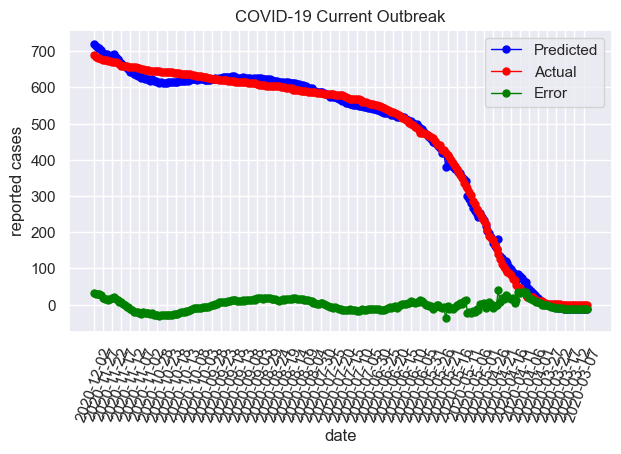

In [29]:
sns.set(style='darkgrid')

plt.figure(figsize=(7, 4), dpi=100)
plt.plot(dc.index, dc["Predicted"], label="Predicted", linewidth=1, marker='.', markersize=10, color='blue')
plt.plot(dc.index, dc["Actual"], label="Actual", linewidth=1, marker='.', markersize=10, color='red')
plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(dc.index[::5], rotation=70)
plt.title('COVID-19 Current Outbreak')
plt.xlabel('date')
plt.ylabel('reported cases')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()

In [30]:
#Score the prediction with mse and r2
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 235.51957289828206
R-squared (R2): 0.9955771661973327


In [31]:
# Overall score for the model
model.score(X,y)

0.9955771661973327

In [32]:
# make a prediction
predictions = model.predict(X)
# show the inputs and predicted outputs
for i in range(len(X)):
    print(predictions[i])
       #print(y)

720.8324712278315
715.1209574378404
708.8105024074389
709.1762301784665
704.1371369397937
696.3899340833482
693.1085918058834
692.1656842903453
684.4741303379685
687.3373465375369
688.4438895661895
691.7327059300821
685.0915701211736
679.3533259102564
672.3105486307118
667.4377628771781
661.6841825236886
658.9309978464164
652.3409063537999
649.8473088632998
643.6382659402157
643.4151447577626
636.2323560491066
633.8108429684467
632.4960046770452
630.4420575754143
627.2414382395807
629.8736036269438
624.2981648617595
622.7473986558987
622.8809790043588
618.7655376551254
624.1091136776092
616.5208636964473
616.6519459218489
615.2120792313226
613.0819850869793
613.6289108037004
612.3438225176608
612.3875719971195
611.9921377885562
614.2981772329847
614.2156273963101
614.3824278000993
615.4433210581174
615.7595851084288
616.1005347556281
617.7905362612007
617.7209022291897
616.5034156605257
616.7729121140046
620.0763201240527
618.9490126542648
620.9884568899481
623.0847485850884
623.694189